In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('train.csv')
synthDf = pd.read_csv('machine failure_SyntheticData.csv').drop('UDI', axis=1)
testDf = pd.read_csv('test.csv')
testDf.set_index('id', inplace=True)

df.set_index('id', inplace=True)

In [3]:
df

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,,
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0


In [4]:
synthDf

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [5]:
testDf

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,
136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0


In [6]:
#only 2148 failures, Use Precision for validation
df['Machine failure'].groupby(df['Machine failure']).count()

Machine failure
0    134281
1      2148
Name: Machine failure, dtype: int64

In [7]:
len(df['Product ID'].unique())

9976

## Product ID Merge

In [8]:
trainIDs = list(df['Product ID'].unique())

In [9]:
testIDs = list(testDf['Product ID'].unique())

In [10]:
IDs = list(set(trainIDs + testIDs))

In [11]:
len(IDs)

9995

## EDA

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136429 entries, 0 to 136428
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Product ID               136429 non-null  object 
 1   Type                     136429 non-null  object 
 2   Air temperature [K]      136429 non-null  float64
 3   Process temperature [K]  136429 non-null  float64
 4   Rotational speed [rpm]   136429 non-null  int64  
 5   Torque [Nm]              136429 non-null  float64
 6   Tool wear [min]          136429 non-null  int64  
 7   Machine failure          136429 non-null  int64  
 8   TWF                      136429 non-null  int64  
 9   HDF                      136429 non-null  int64  
 10  PWF                      136429 non-null  int64  
 11  OSF                      136429 non-null  int64  
 12  RNF                      136429 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 14.6+ MB


In [70]:
modelDf = df.drop(['Product ID', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)

In [13]:

# Count the unique values in each column
print(df.nunique())
print(testDf.nunique())

# Perform value counts for Type column
print(df['Type'].value_counts())

Product ID                 9976
Type                          3
Air temperature [K]          95
Process temperature [K]      81
Rotational speed [rpm]      952
Torque [Nm]                 611
Tool wear [min]             246
Machine failure               2
TWF                           2
HDF                           2
PWF                           2
OSF                           2
RNF                           2
dtype: int64
Product ID                 9909
Type                          3
Air temperature [K]          92
Process temperature [K]      84
Rotational speed [rpm]      946
Torque [Nm]                 595
Tool wear [min]             246
TWF                           2
HDF                           2
PWF                           2
OSF                           2
RNF                           2
dtype: int64
L    95354
M    32152
H     8923
Name: Type, dtype: int64


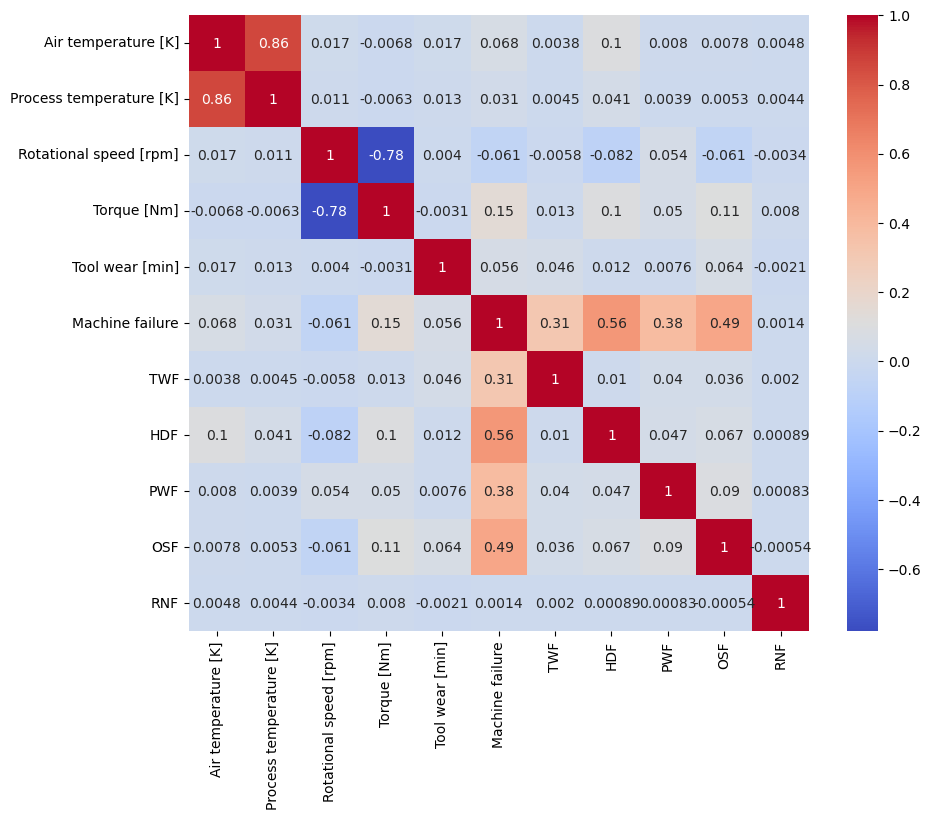

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot a correlation matrix heatmap
corr_matrix = df.corr(numeric_only=True)  # Specify numeric_only parameter
plt.figure(figsize=(10, 8))  # Adjust the figure size as desired
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


## Scaling Data

In [15]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
cols_to_scale = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
                   'Torque [Nm]']

# Create a scaler object
scaler = StandardScaler()

# Scale the numeric columns
df_scaled = df.copy()  # Create a copy of the DataFrame to store the scaled values
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Scale the numeric columns
testDf_scaled = testDf.copy()  # Create a copy of the DataFrame to store the scaled values
testDf_scaled[cols_to_scale] = scaler.fit_transform(testDf[cols_to_scale])


In [16]:
df_scaled

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,,
0,L50096,L,0.395880,-0.246230,0.545416,-0.499711,140,0,0,0,0,0,0
1,M20343,M,1.469856,1.558605,1.720308,-1.323028,200,0,0,0,0,0,0
2,L49454,L,-0.302204,-1.040358,2.051873,-1.628831,25,0,0,0,0,0,0
3,L53355,L,0.610675,0.692284,0.026445,0.464745,197,0,0,0,0,0,0
4,M24050,M,-1.000288,-0.679391,0.869773,-0.582043,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,M22284,M,0.127386,1.053251,0.069693,-0.335048,210,0,0,0,0,0,0
136425,H38017,H,-1.268781,-1.040358,-0.528565,1.029305,2,0,0,0,0,0,0
136426,L54690,L,0.342182,1.342025,0.026445,-0.217431,214,0,0,0,0,0,0


In [17]:
testDf_scaled

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,
136429,L50896,L,1.313830,1.126570,-0.153806,-0.274579,60,0,0,0,0,0
136430,L53866,L,0.990824,0.765635,1.375097,-1.356341,17,0,0,0,0,0
136431,L50498,L,0.775487,0.332512,0.031949,-0.309854,96,0,0,0,0,0
136432,M21232,M,0.129475,-0.244985,-0.296694,0.854217,5,0,0,0,0,0
136433,M19751,M,1.906008,1.704068,-0.039496,0.113445,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
227378,L51130,L,1.313830,1.054383,-0.260972,0.007620,15,0,0,0,0,0
227379,L47783,L,-1.054879,-0.100611,0.153403,-0.768427,31,0,0,0,0,0
227380,L48097,L,-2.293068,-2.699348,-0.139517,0.125203,187,0,0,0,0,0


## Creating dummy variables for 'Type'

In [18]:
# Create dummy variables for the "Product ID" column
modelDf = pd.get_dummies(modelDf, columns=['Type'])
test_modelDf = pd.get_dummies(testDf_scaled, columns=['Type'])

## Creating Dummy Variables for 'Product ID'

In [19]:
# Create dummy variables for 'Product ID' column in df_scaled
df_dummies = pd.get_dummies(df_scaled['Product ID'])

# Reindex the dummy variables dataframe with the complete list of unique product IDs
df_dummies = df_dummies.reindex(columns=IDs, fill_value=0)

# Create dummy variables for 'Product ID' column in testDf_scaled
test_dummies = pd.get_dummies(testDf_scaled['Product ID'])

# Reindex the dummy variables dataframe with the complete list of unique product IDs
test_dummies = test_dummies.reindex(columns=IDs, fill_value=0)

In [20]:
print("df_dummies shape:", df_dummies.shape)
print("test_dummies shape:", test_dummies.shape)

df_dummies shape: (136429, 9995)
test_dummies shape: (90954, 9995)


In [21]:
# Add df_dummies to modelDf
modelDf = pd.concat([modelDf, df_dummies], axis=1)

# Add test_dummies to test_modelDf
test_modelDf = pd.concat([test_modelDf, test_dummies], axis=1)

In [22]:
modelDf.shape

(136429, 10010)

In [23]:
test_modelDf.shape

(90954, 10009)

In [24]:
modelDf.drop(['Product ID', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

In [25]:
test_modelDf.drop(['Product ID', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

In [26]:
modelDf

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type_H,Type_L,Type_M,M23180,...,L52119,M22398,M24070,L55394,M15456,L55143,L47682,L47284,L50762,M22472
id,,,,,,,,,,,,,,,,,,,,,
0,0.395880,-0.246230,0.545416,-0.499711,140,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.469856,1.558605,1.720308,-1.323028,200,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.302204,-1.040358,2.051873,-1.628831,25,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.610675,0.692284,0.026445,0.464745,197,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.000288,-0.679391,0.869773,-0.582043,34,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127386,1.053251,0.069693,-0.335048,210,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
136425,-1.268781,-1.040358,-0.528565,1.029305,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136426,0.342182,1.342025,0.026445,-0.217431,214,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
test_modelDf

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M,M23180,M19817,...,L52119,M22398,M24070,L55394,M15456,L55143,L47682,L47284,L50762,M22472
id,,,,,,,,,,,,,,,,,,,,,
136429,1.313830,1.126570,-0.153806,-0.274579,60,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136430,0.990824,0.765635,1.375097,-1.356341,17,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136431,0.775487,0.332512,0.031949,-0.309854,96,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136432,0.129475,-0.244985,-0.296694,0.854217,5,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
136433,1.906008,1.704068,-0.039496,0.113445,114,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227378,1.313830,1.054383,-0.260972,0.007620,15,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227379,-1.054879,-0.100611,0.153403,-0.768427,31,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227380,-2.293068,-2.699348,-0.139517,0.125203,187,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train/Test Split

In [28]:
# Split the DataFrame into features (X) and target variable (y)
X = modelDf.drop(['Machine failure'], axis=1)  # Features (input variables)
y = df['Machine failure']  # Target variable (output variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (109143, 10003)
X_test shape: (27286, 10003)
y_train shape: (109143,)
y_test shape: (27286,)


## Model 1: Random Forrest

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

accuracies = []
AUCs = []

for i in range(200, 600, 4):
    start_time = time.time()  # Record the start time
    print(f'Max Depth: {i}')
    # Create a Random Forest classifier
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=42)

    # Train the model on the training data
    rf_model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rf_model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    accuracies.append(accuracy)
    AUCs.append(auc_score)

    duration = time.time() - start_time  # Calculate the duration
    print(f"Loop duration: {duration:.2f} seconds")



#### Optimal Max_Depth is 275, with 100 estimators

In [ ]:
# Plotting the AUCs and accuracies
x = range(200, 600, 4)
plt.plot(x, AUCs, label='AUC')
plt.plot(x, accuracies, label='Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('AUC and Accuracy Scores for Different Max Depths')
plt.legend()
plt.show()

In [ ]:
accuracies = []
AUCs = []

for i in range(50, 400, 7):
    start_time = time.time()  # Record the start time
    print(f'Estimators: {i}')
    # Create a Random Forest classifier
    rf_model = RandomForestClassifier(n_estimators=i, max_depth=275, random_state=42)

    # Train the model on the training data
    rf_model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rf_model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    accuracies.append(accuracy)
    AUCs.append(auc_score)

    duration = time.time() - start_time  # Calculate the duration
    print(f"Loop duration: {duration:.2f} seconds")



In [ ]:
# Plotting the AUCs and accuracies
x = range(50, 400, 7)
plt.plot(x, AUCs, label='AUC')
plt.plot(x, accuracies, label='Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('AUC and Accuracy Scores for Different Max Depths')
plt.legend()
plt.show()

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Define the objective function to be maximized
def objective(trial):
    # Define the search space for hyperparameters
    max_depth = trial.suggest_int('max_depth', 200, 600)
    n_estimators = trial.suggest_int('n_estimators', 50, 600)

    # Create a Random Forest classifier with the current hyperparameters
    #print(f"Testing: \nMax Depth - {max_depth} \nn_estimators - {n_estimators}")
    rf_model = RandomForestClassifier(
        max_depth=max_depth,
        n_estimators=n_estimators,
        random_state=42,
        n_jobs=-1
    )

    # Train the model on the training data
    rf_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf_model.predict(X_test)

    # Calculate the AUC score
    auc_score = roc_auc_score(y_test, y_pred)

    return auc_score

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters and AUC score
best_params = study.best_params
best_auc = study.best_value

print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

print("Best AUC:", best_auc)


## Model 2: SVC

#### First we must rescale the original DF suing Min_Max instead of standard, so no segative values will be present

In [35]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler to scale features to (0, 1) range
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select top k features based on chi-square test
k = 250  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = [X.columns[i] for i in selected_feature_indices]

# Print the selected feature names

len(selected_feature_names)


250

In [42]:
X_train_sel

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0.681319,0.546832,0.304348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.593407,0.542700,0.335968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.351648,0.730028,0.106719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.692308,0.384298,0.063241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.395604,0.398072,0.490119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109138,0.780220,0.460055,0.588933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109139,0.296703,0.446281,0.624506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109140,0.637363,0.504132,0.292490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109141,0.604396,0.396694,0.162055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
X_test_sel = pd.DataFrame(X_test_selected)

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler to scale features to (0, 1) range
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select top k features based on chi-square test
k = 200  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Create polynomial features only on selected features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_selected)
X_test_poly = poly_features.transform(X_test_selected)

# Train the logistic regression model
logreg = LogisticRegression(C=0.1, solver='saga', max_iter=1000)
logreg.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred_proba = logreg.predict_proba(X_test_poly)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.8589849723932057


In [54]:
# Apply MinMaxScaler to scale features of the 'test_modelDf'
X_test_model_scaled = scaler.transform(test_modelDf)

# Select top k features based on chi-square test for the 'test_modelDf'
X_test_model_selected = selector.transform(X_test_model_scaled)

# Create polynomial features only on selected features for the 'test_modelDf'
X_test_model_poly = poly_features.transform(X_test_model_selected)

# Make predictions on the 'test_modelDf'
y_pred_proba_test_model = logreg.predict_proba(X_test_model_poly)[:, 1]

# Print the predicted probabilities
print(y_pred_proba_test_model)


[0.00754881 0.0025666  0.0059926  ... 0.00831955 0.00308867 0.01040052]


In [57]:
import pandas as pd

# Set the threshold for classification
threshold = 0.5

# Convert predicted probabilities to binary predictions
predictions = [1 if p >= threshold else 0 for p in y_pred_proba_test_model]

# Create a dataframe with binary predictions
predictions_df = pd.DataFrame({'Machine failure': predictions})




       Prediction
0               0
1               0
2               0
3               0
4               0
...           ...
90949           0
90950           0
90951           0
90952           0
90953           0

[90954 rows x 1 columns]


In [61]:
predictions_df = predictions_df.rename_axis('id')

,Prediction
id,
0,0
1,0
2,0
3,0
4,0
...,...
90949,0
90950,0
90951,0


In [63]:
testDf['Machine failure'] = predictions

In [66]:
testDf

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
id,,,,,,,,,,,,,
136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0,0
136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0,0
136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0,0
136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0,0
136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0,0
227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0,0
227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0,0


In [69]:
testDf['Machine failure'].to_csv('submit_2.csv')

## Model 3: Logistic Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC Score:", roc_auc)
